<a href="https://colab.research.google.com/github/gmartini1/projects_in_data_science/blob/main/Analisando_os_Dados_do_Airbnb_(Los_Angeles).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
## <center>Análise dos Dados do Airbnb - **Los Angeles, Califórnia**

---
<center>by Gabriel Martini - Data Scientist</center>
<center>February 28, 2023</center> 
<br> 

<center><img alt="Colaboratory logo" width="100%" src="https://github.com/gmartini1/mx_data_science/blob/main/city.jpg?raw=true"></center>

<br>
<p align="justify">O Airbnb é uma plataforma online que permite que pessoas ofereçam acomodações para aluguel, desde quartos compartilhados até casas inteiras. A empresa ganha dinheiro cobrando uma taxa de serviço tanto dos anfitriões quanto dos hóspedes.
<br>

<p align="justify">Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

<p align="justify">Fundada em 2008, a empresa expandiu rapidamente o seu negócio e atualmente está presente em 220 países, onde já hospedou mais de 750 milhões de pessoas com seus 4 milhões de anúncios ativos dentro da sua plataforma. 

<p align="justify">O Airbnb enfrenta concorrência de outras empresas de aluguel de curto prazo, como a Vrbo e a Booking.com, além de hotéis e pousadas tradicionais.</p>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Los Angeles, e ver quais insights podem ser extraídos a partir de dados brutos.**

<center><img alt="Colaboratory logo" width="45%" src="https://github.com/gmartini1/mx_data_science/blob/main/logo_city.png?raw=true"></center>

## Obtenção dos Dados

<p align="justify">
O principal obejtivo desta pesquisa exploratória, deve-se ao levantamento de insights para um melhor entendimento sobre o mercado de hospedagem em Los Angeles. Dentre as possíveis análises que podem ser realizadas, incluem:</p>
<br>

**1 - Análise descritiva dos dados**
<p align="justify"> Nesta etapa inicial do projeto, faremos o levantamento estatístico descritivo dos dados, ou seja, vamos obter os resultados da média, mediana, desvio padrão, correlação, mínimo e máximo para analisarmos a distribuição dos dados e identificar possíveis outliers.</p><br>

**2 - Análise geoespacial**
<p align="justify"> Os dados de localização dos imóveis podem ser utilizados para criar mapas que mostram a distribuição das hospedagens em diferentes áreas de Los Angeles. Isso pode ajudar a identificar as áreas mais populares entre os turistas, e ainda, avaliar a concorrência entre hospedagens.</p><br>

**3 - Análise de preços**
<p align="justify"> Será possível analisar os preços das hospedagens em diferentes áreas de Los Angeles e identificar padrões e tendências nos preços. Por exemplo, podemos verificar se existem áreas mais caras ou mais baratas para se hospedar em Los Angeles.</p><br>

**4 - Análise de comentários e avaliações (reviews)**
<p align="justify"> Esses dados podem ser utilizados para avaliar a qualidade das hospedagens em Los Angeles e identificar possíveis pontos de melhoria para os imóveis dos anfitriões.</p><br>

**5 - Análise de tendências ao longo do tempo**
<p align="justify"> É possível analisar os dados ao longo do tempo para identificar tendências e padrões sazonais no mercado de hospedagem em Los Angeles. Um ótimo exemplo seria verificar se existem épocas do ano em que a demanda por hospedagens é maior ou se os preços praticados das hospedagens variam ao longo do ano.</p><br>

Para a realização da análise exploratória dos dados, referente à cidade de Los Angeles, todas as informações foram extraídas do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), utilizando o arquivo de captura [listings.csv](http://data.insideairbnb.com/united-states/ca/los-angeles/2022-12-06/visualisations/listings.csv).

In [1]:
# importando os pacotes necessarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import folium
from folium.plugins import HeatMap

In [2]:
# importar o arquivo listings.csv (Summary information and metrics for listings in Los Angeles ) para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ca/los-angeles/2022-12-06/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - chave de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - chave de id do proprietário (anfitrião) da propriedade
* `host_name` - nome do proprietário do imóvel (anfitrião)
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro onde está localizado o imóvel
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - apresenta o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar o imóvel
* `number_of_reviews` - número de avaliações que a propriedade possui
* `last_review` - data da última avaliação do imóvel
* `reviews_per_month` - quantidade de avaliações por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias


<p align="justify">Após carregarmos o arquivo, já é possível iniciarmos a análise exploratória dos dados para extrair insights e entendermos melhor o mercado de hospedagens em Los Angeles.</p>
<br>

### **Análise Descritiva dos dados**

In [3]:
# Visualizar as 5 primeiras entradas do dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.98301,-118.38607,Entire home/apt,115,30,2,2016-05-15,0.01,1,227,0,NaN
1,2708,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,3008,Chas.,City of Los Angeles,Hollywood,34.09625,-118.34605,Private room,118,30,38,2022-11-29,0.37,2,239,5,NaN
2,2732,Zen Life at the Beach,3041,Yoga Priestess,Other Cities,Santa Monica,34.00440,-118.48095,Private room,179,7,24,2022-08-21,0.17,2,365,3,NaN
3,65467,A Luxury Home in Los Angeles,61864,Olivier,Other Cities,Culver City,34.02438,-118.38374,Private room,300,60,0,NaN,NaN,2,365,0,NaN
4,206662,"Hollywood & Hiking, 30 day minimum",33861,Kevin,City of Los Angeles,Hollywood Hills West,34.10420,-118.34748,Private room,46,30,95,2022-08-11,0.71,1,84,4,NaN


In [4]:
# Visualizar as 5 últimas entradas do dataset
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
40433,774860592421665035,Cozy Hollywood Studio with Patio,458988009,Hollywood,Other Cities,West Hollywood,34.091006,-118.344620,Entire home/apt,128,3,0,NaN,NaN,24,176,0,NaN
40434,774864578948159716,Playa Vista 2BR W/ Private Wifi,187543153,Elliot,City of Los Angeles,Playa Vista,33.975508,-118.430657,Entire home/apt,180,30,0,NaN,NaN,56,30,0,NaN
40435,774866706304798119,Centrally Located LA Retreat,41968542,Mo,City of Los Angeles,Leimert Park,34.014228,-118.320888,Entire home/apt,104,30,0,NaN,NaN,3,144,0,NaN
40436,774872573559544018,2BR Bungalow in Culver City-Near LAX,462077128,Aileen,Other Cities,Culver City,33.985194,-118.393408,Entire home/apt,167,1,0,NaN,NaN,6,360,0,NaN
40437,774889783296314664,洛杉矶*熙臻行馆Venetian 独立雅房,183748799,Amy,Other Cities,Alhambra,34.070314,-118.134431,Private room,81,2,0,NaN,NaN,44,364,0,NaN


In [ ]:
# Usando a sintaxe "df.columns" para visualizar todas as variáveis do nosso dataset.
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [ ]:
# Contar o número total de registros
num_registros = len(df)
print("Número total de hospedagens: ", num_registros)

Número total de hospedagens:  40438


In [ ]:
# Calcular o preço médio das hospedagens
preco_medio = df["price"].mean()
print(f"Preço médio das hospedagens: $ {preco_medio:.2f}")

Preço médio das hospedagens: $ 279.45


In [ ]:
# calcular a Mediana dos preços das hospedagens
mediana = df["price"].median()
print(f'A mediana do preço das hospedagens: ${mediana}')

A mediana do preço das hospedagens: $138.0


In [ ]:
# Calcular o Desvio padrão dos preços das hospedagens
preco_desvio_padrao = df["price"].std()
print(f'Desvio padrão do preço das hospedagens: ${preco_desvio_padrao:.2f}')

Desvio padrão do preço das hospedagens: $1136.46


In [ ]:
# Calcular o preço mínimo e máximo das hospedagens
preco_minimo = df["price"].min()
preco_maximo = df["price"].max()
print(f'Preço mínimo das hospedagens: ${preco_minimo:.2f}')
print(f'Preço máximo das hospedagens: ${preco_maximo:.2f}')

Preço mínimo das hospedagens: $0.00
Preço máximo das hospedagens: $99999.00


In [ ]:
# Número de hospedagens em diferentes tipos de acomodações
tipo_acomodacao = df["room_type"].value_counts()
print(f'Número de hospedagens em cada tipo de acomodação:\n{tipo_acomodacao}')

Número de hospedagens em cada tipo de acomodação:
Entire home/apt    28317
Private room       11253
Shared room          784
Hotel room            84
Name: room_type, dtype: int64


In [ ]:
# Número de hospedagens em diferentes bairros
hospedagens_bairros = df['neighbourhood'].value_counts()
print(f'Número de hospedagens em cada bairro:\n{hospedagens_bairros}')

Número de hospedagens em cada bairro:
Hollywood         1708
Venice            1565
Long Beach        1467
Sherman Oaks      1439
Santa Monica      1233
                  ... 
Cudahy               2
Hasley Canyon        2
Walnut Park          2
Elizabeth Lake       1
East Compton         1
Name: neighbourhood, Length: 265, dtype: int64


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
# [0] linhas | [1] colunas

print(f'N° de entradas: {df.shape[0]:>6}')

print(f'N° de variáveis: {df.shape[1]:>5}\n')

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

N° de entradas:  40438
N° de variáveis:    18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `license` possui 74,6% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem a mesma quantidade de valores nulos, ou seja, com 26,17% dos dados ausentes.
* As variáveis `name` e `host_name` têm aproximadamente 0,005% dos valores nulos.

In [ ]:
# listar as variáveis por seus valores ausentes
df.isnull().sum() / df.shape[0]

id                                0.000000
name                              0.000049
host_id                           0.000000
host_name                         0.000049
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.261759
reviews_per_month                 0.261759
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
license                           0.746229
dtype: float64

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           0.746229
reviews_per_month                 0.261759
last_review                       0.261759
host_name                         0.000049
name                              0.000049
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
Para identificar a distribuição das variáveis, iremos plotar o histograma.

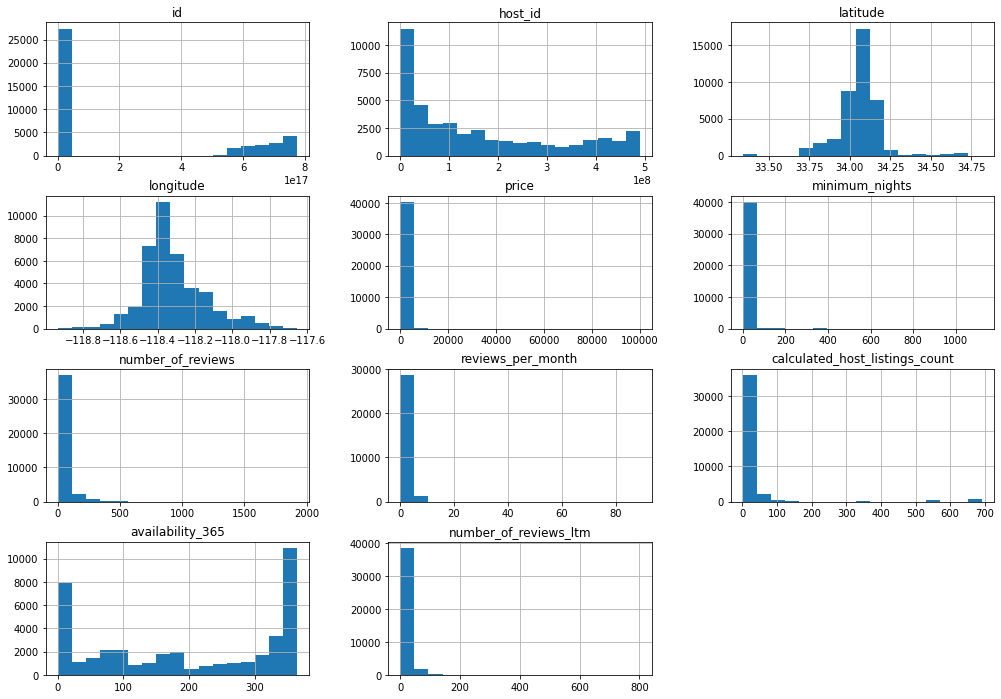

In [ ]:
# plotar o histograma das variáveis numéricas
# bins: parâmetro que o histograma considera para criar as barras por nº de intervalos
df.hist(bins=17, figsize=(17, 12));

### **Q4. Há *outliers* presentes?**
Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `reviews_per_month`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'availability_365',
    'reviews_per_month', 'calculated_host_listings_count']].describe()

,price,minimum_nights,number_of_reviews,availability_365,reviews_per_month,calculated_host_listings_count
count,40438.000000,40438.000000,40438.000000,40438.000000,29853.000000,40438.000000
mean,279.449602,18.700653,33.562021,198.164969,1.499085,32.550126
std,1136.463147,30.973639,72.691163,142.646899,1.866809,114.678176
min,0.000000,1.000000,0.000000,0.000000,0.010000,1.000000
25%,85.000000,2.000000,0.000000,62.000000,0.240000,1.000000
50%,138.000000,30.000000,5.000000,190.000000,0.800000,2.000000
75%,235.000000,30.000000,31.000000,348.000000,2.250000,10.000000
max,99999.000000,1124.000000,1924.000000,365.000000,89.000000,693.000000


Com base nos valores máximos e mínimos de cada coluna no resumo estatístico acima, podemos confirmar possíveis outliers no conjunto de dados:

* **Variável price** <p align='justify'>Tem uma média de 279,45 dólares por noite, porém a distribuição de preços é bastante ampla, com um desvio padrão de 1136,46 dólares e um preço máximo de 99999 dólares, indicando que há grande variação nos preços em Los Angeles e que podem representar propriedades de luxo ou erro de registro.</p><br>

* **Variável minimum_nights**<p align="justify"> A maioria das propriedades requerem um mínimo de 4 noites de estadia. O valor mínimo é de 1 noite e o máximo é de 1124 noites. Já o terceiro quartil é de apenas 30 noites, o que evidencia ser um resultado atípico.</p><br>

* **Variável number_of_reviews**<p align="justify">O valor máximo é de 1924 avaliações, enquanto o valor médio é de 33 avaliações e o mínimo é de 0. Isso indica a presença de possíveis outliers com valores muito acima da média ou erros de registro.</p><br>

* **Variável availability_365**<p align="justify">O valor máximo é de 365 dias e o valor mínimo é de 0 dias, enquanto que o valor médio é de 198 dias. Isso indica também a presença de outliers na amostra com valores muito acima da média e que podem representar propriedades que ficam disponíveis durante todo o ano ou apenas erros de registro.</p><br> 

* **Variável reviews_per_month**<p align="justify">O valor máximo é de 89 avaliações por mês, enquanto o valor médio é de 1,49 avaliações por mês e o mínimo de 0,01 avaliações por mês. Isso também indica a presença de outliers na amostra com possíveis erros de registro.</p><br>

* **Variável calculated_host_listings_count**<p align="justify">O valor máximo é de 693 propriedades listadas, enquanto o valor médio é de 32 propriedades e o valor mínimo é de 1 propriedade, indicando também uma possível presença de outliers com valores muito acima da média, que podem representar empresas com muitas propriedades listadas com erro de registro.</p><br>

#### Boxplot para price

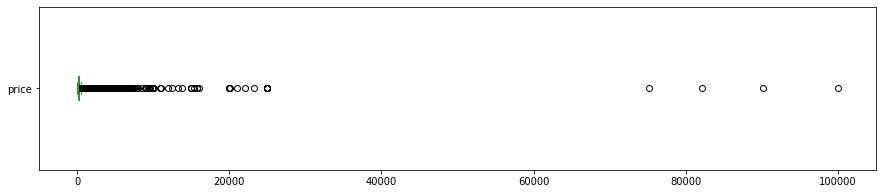


Price: valores acima de $950
Entradas: 1584
0.0392%


In [ ]:
# price
df.price.plot(kind="box", vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 950 para price
print(f'\nPrice: valores acima de $950')
print('Entradas:', (len(df[df.price > 950])))
print("{:.4f}%".format(len(df[df.price > 950]) / df.shape[0]))
# ou print(f'{len(df[df.price > 950]) / df.shape[0]*100:.4f}','%')


#### Boxplot para minimum_nights

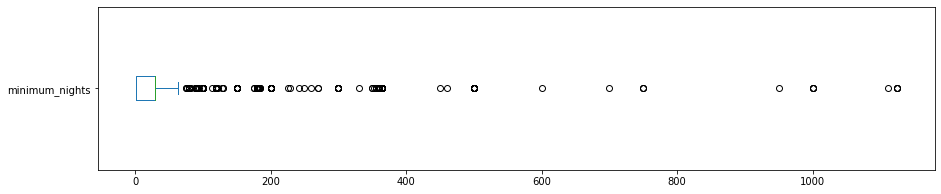


Valores acima de 15 dias
Entradas: 20671
0.5112%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind="box", vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 15 dias para minimum_nights
print(f'\nValores acima de 15 dias')
print('Entradas:', (len(df[df.minimum_nights > 15])))
print("{:.4f}%".format(len(df[df.minimum_nights > 15]) / df.shape[0]))
# ou print(f'{len(df[df.minimum_nights > 15]) / df.shape[0]*100:.4f}','%')

#### Boxplot para reviews_per_month

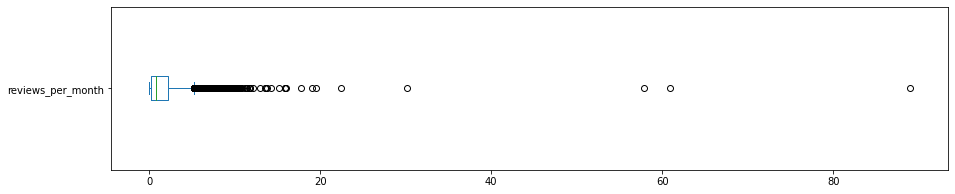


Valores acima de 5 avaliações
Entradas: 1460
0.0361%


In [ ]:
# reviews_per_month
df.reviews_per_month.plot(kind="box", vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 5 avaliações para reviews_per_month
print(f'\nValores acima de 5 avaliações')
print('Entradas:', (len(df[df.reviews_per_month > 5])))
print("{:.4f}%".format(len(df[df.reviews_per_month > 5]) / df.shape[0]))
# ou print(f'{len(df[df.reviews_per_month > 5]) / df.shape[0]*100:.4f}','%')

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

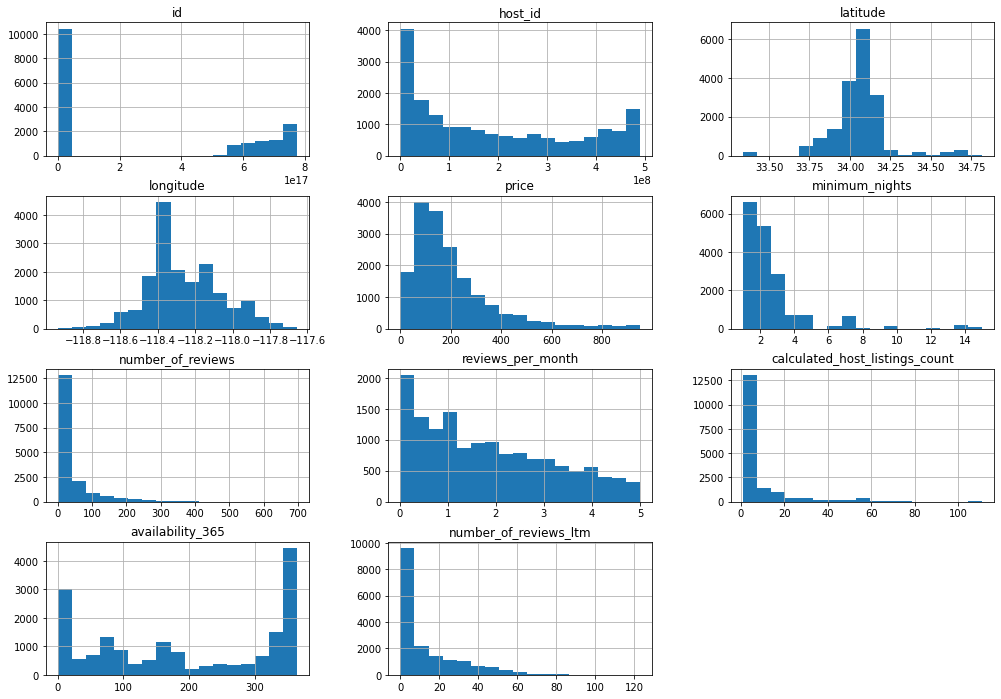

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 950].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 15].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.reviews_per_month > 5].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=17, figsize=(17,12));


### **Q5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela, através da sua força e direção.

Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'availability_365',
    'reviews_per_month', 'calculated_host_listings_count']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,availability_365,reviews_per_month,calculated_host_listings_count
price,1.000000,0.075073,-0.053410,0.074659,-0.030082,0.062058
minimum_nights,0.075073,1.000000,-0.046888,-0.068546,-0.239983,-0.067542
number_of_reviews,-0.053410,-0.046888,1.000000,-0.026586,0.460385,-0.153113
availability_365,0.074659,-0.068546,-0.026586,1.000000,0.130909,0.215911
reviews_per_month,-0.030082,-0.239983,0.460385,0.130909,1.000000,-0.067415
calculated_host_listings_count,0.062058,-0.067542,-0.153113,0.215911,-0.067415,1.000000


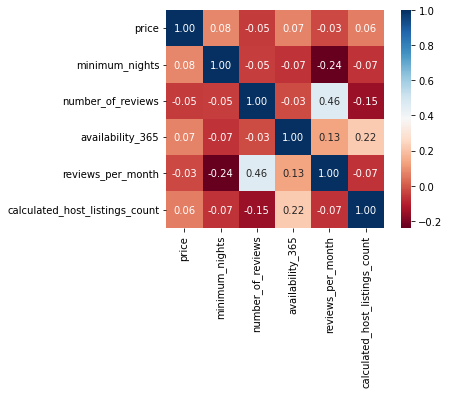

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**
A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos,casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    11947
Private room        5285
Shared room          225
Hotel room            65
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df.shape[0]

Entire home/apt    0.295440
Private room       0.130694
Shared room        0.005564
Hotel room         0.001607
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara de Los Angeles?**
Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10] 

neighbourhood
Malibu                                   538.422222
Griffith Park                            535.000000
Beverly Crest                            474.347826
Lake View Terrace                        447.000000
Hollywood Hills West                     442.459259
Beverlywood                              425.000000
Rancho Palos Verdes                      418.043478
Unincorporated Santa Monica Mountains    416.720339
Brentwood                                411.518519
Pacific Palisades                        411.045455
Name: price, dtype: float64

Acima, vemos que bairros como Malibu, Griffith Parke, Beverly Crest estão com média de preço superior a de lugares como Beverly Hills, Santa Monica e Hollywood.

Uma pessoa que não conhecesse Los Angeles poderia apresentar esses resultados sem se questionar. Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para Griffith Park e Lake View Terrace.

In [ ]:
# plotar os imóveis pela latitude-longitude
print(df_clean[df_clean.neighbourhood == 'Griffith Park'].shape)

# ver as 3 entradas de Griffith Park
df_clean[df_clean.neighbourhood == 'Griffith Park']

(3, 18)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
2601,6361729,Exquisite Los Feliz Mid-Century gem,32700396,Ron,City of Los Angeles,Griffith Park,34.11825,-118.28948,Entire home/apt,950,7,3,2017-07-24,0.03,1,0,0,HSR20-000665
10160,25010546,"Los Feliz, Spanish Hillside Retreat",1457902,Adam,City of Los Angeles,Griffith Park,34.11850,-118.28701,Entire home/apt,480,5,6,2022-07-20,0.11,1,7,2,HSR22-000082
21335,48785476,Boho Chic Studio- Pet Friendly + Free Parking,60164060,Blue,City of Los Angeles,Griffith Park,34.15456,-118.32231,Entire home/apt,175,3,71,2022-11-26,4.32,1,157,56,NaN


In [ ]:
# plotar os imóveis pela latitude-longitude
print(df_clean[df_clean.neighbourhood == 'Lake View Terrace'].shape)

# ver as 3 entradas de Lake View Terrace
df_clean[df_clean.neighbourhood == 'Lake View Terrace']

(1, 18)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
18956,45287533,STUNNING LOS ANGELES HOME WITH A VIEW,231171448,Krystal,City of Los Angeles,Lake View Terrace,34.28576,-118.39944,Entire home/apt,447,2,64,2022-11-19,2.6,1,350,23,HSR20-001938


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

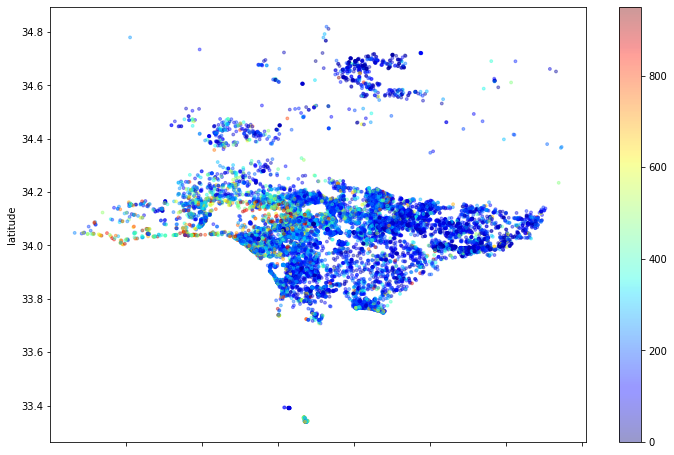

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

<p align="justify"> Agora vamos criar um mapa de calor utilizando a biblioteca folium e a função HeatMap, que utiliza as coordenadas de latitude e longitude dos imóveis para criar uma representação visual da densidade de hospedagens em Los Angeles. Neste caso, vamos plotar o gráfico diretamente no arquivo notebook, porém poderia também ser plotado em um "arquivo.html".</p>

<p align="justify"> No código abaixo, as coordenadas geográficas  [34.0522, -118.2437] são utilizadas para definir a localização central do mapa que será criado.</p>

<p align="justify"> O primeiro elemento [34.0522] corresponde à latitude da localização central do mapa, enquanto a segunda coordenada [-118.2437] corresponde à longitude. Esses valores são utilizados pelo módulo folium para centrar o mapa na região de Los Angeles.</p>

<p align="justify">Os valores exatos [34.0522, -118.2437] correspondem à latitude e longitude da Union Station em Los Angeles, que é uma das principais estações de transporte público da cidade e pode ser considerada um ponto central da região.</p>

In [7]:
# criar mapa com centro em Los Angeles
mapa = folium.Map(location=[34.0522, -118.2437], zoom_start=10)
dados = df[['latitude', 'longitude']].values.tolist()
HeatMap(dados).add_to(mapa)

# exibir mapa
mapa

## Conclusões


Ao analisar os dados brutos do arquivo "listings.csv", fornecido pelo portal Inside Airbnb para Los Angeles, com última atualização em 06 de dezembro de 2022, podemos obter as seguintes conclusões:<br>

><p align="justify">Fica evidente que mesmo realizando uma análise superficial sobre a versão resumida  do dataset do Airbnb, existem *outliers* em algumas variáveis.<br>

><p align="justify">Nota-se que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas das variáveis analisadas.<br>

><p align="justify">O arquivo contém informações sobre 40.438 listagens de acomodação em Los Angeles. Cada linha do arquivo representa uma listagem única.
<br>

><p align="justify">O arquivo na versão resumida, contém 18 colunas com informações sobre cada listagem. As colunas incluem informações como o Id para identificar o imóvel, o nome da propriedade, Id e nome do anfitrião da propriedade, nome do bairro onde está localizado o imóvel, coordenadas geográficas da propriedade (latitude e longitude), tipo do quarto oferecido na hospedagem, preço do aluguel, quantidade de mínima de noites para reservar o imóvel, número de avaliações da propriedade, quantidade de avaliações por mês, data da última avaliação do imóvel, quantidade de imóveis disponíveis do mesmo anfitrião e o número de dias de disponibilidade do imóvel dentro de 365 dias.
<br>

><p align="justify">Podemos usar as informações do arquivo para responder a diversas perguntas sobre o mercado de aluguel de acomodações em Los Angeles, como por exemplo: Quais são as regiões mais populares para aluguel de acomodações? Qual é a média de preços por região? Quais tipos de acomodações são mais comuns? Entre outras.<br>

><p align="justify">É importante notar que, embora esses dados sejam coletados do site Airbnb, eles são dados públicos e podem ser usados para análises de mercado e outros fins. No entanto, é importante seguir as políticas de uso de dados do site e considerar a privacidade dos proprietários de acomodações.<br>

><p align="justify">Por fim, vale lembrar que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 75 atributos disponíveis no arquivo denominado "listings.csv.gz".<br>